# Workshop 1

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = sns.load_dataset('iris')


In [ ]:
print(df[0:5])
print()
print(df[49:54])
print()
print(df[59:64])

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

    sepal_length  sepal_width  petal_length  petal_width     species
49           5.0          3.3           1.4          0.2      setosa
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor
53           5.5          2.3           4.0          1.3  versicolor

    sepal_length  sepal_width  petal_length  petal_width     species
59           5.2          2.7           3.9          1.4  versicolor
60           5.0          2.0           3.5          1.0  vers

In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


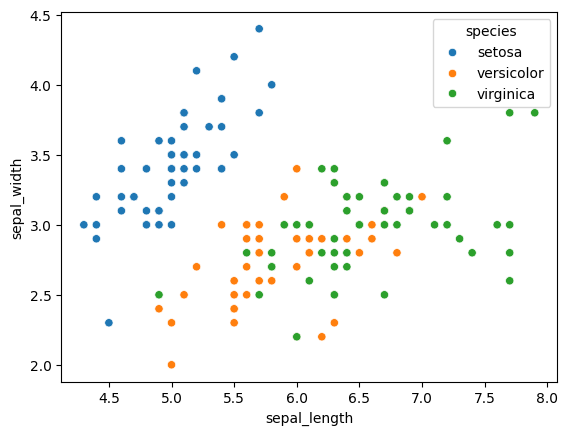

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species')
plt.show()

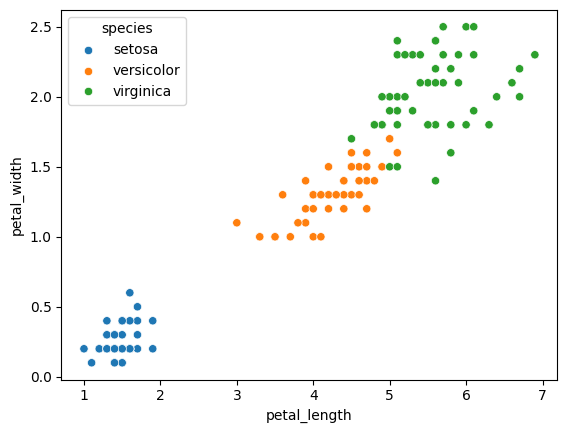

In [ ]:
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species')
plt.show()

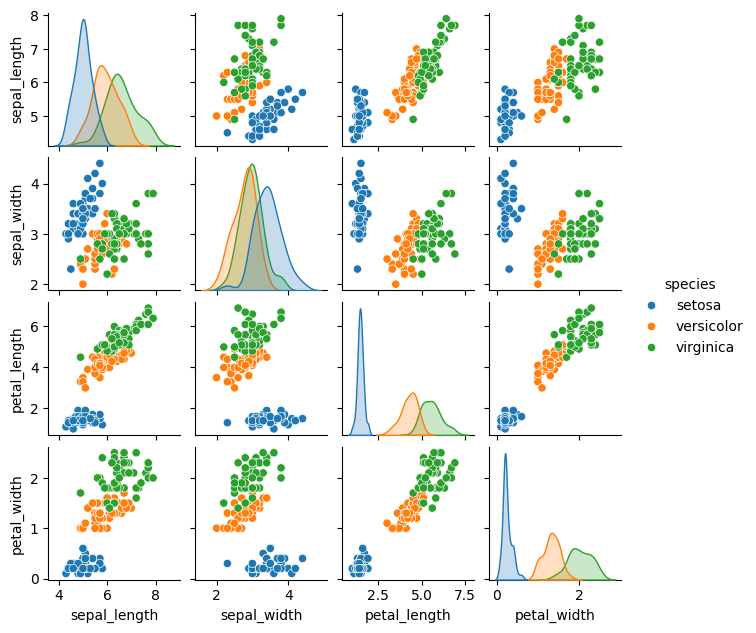

In [ ]:
sns.pairplot(df,hue='species', height=1.6)
plt.show()

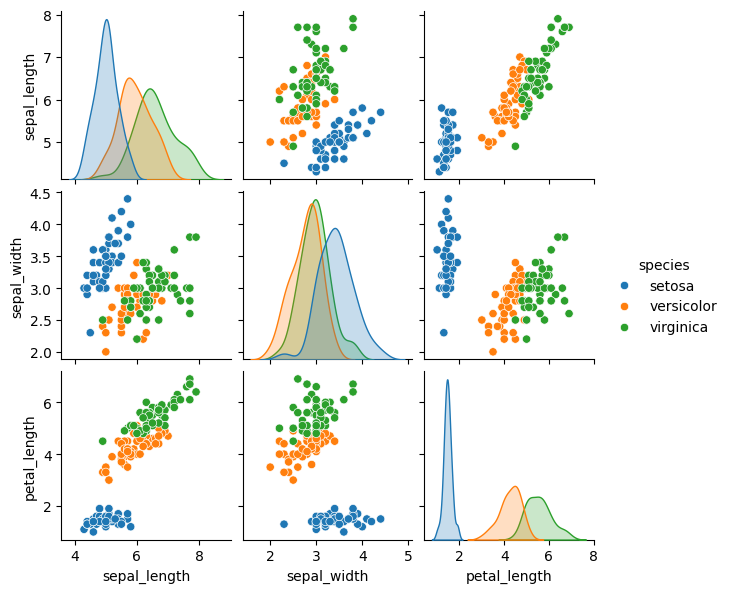

In [ ]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'species']
sns.pairplot(df[columns],hue='species', height=2.0)
plt.show()

## Workshop 2

In [ ]:
X = df.drop('species',axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = df.species
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [ ]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### Workshop 3

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [ ]:
from itertools import count
import numpy as np
(label,count) = np.unique(y_test,return_counts=True)
freq = np.asarray((label, count)).T
print(freq)

[['setosa' 14]
 ['versicolor' 16]
 ['virginica' 15]]


#### workshop4

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_hat = clf.predict(X_test)
y_hat

array(['versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'virginica'], dtype=object)

In [ ]:
y_test.head()

,species
81,versicolor
145,virginica
98,versicolor
121,virginica
18,setosa


In [ ]:
print('Accuracy Score:{:.4f}'.format(accuracy_score(y_test,y_hat)))
print(classification_report(y_test,y_hat))
cm = confusion_matrix(y_test,y_hat)
print(cm)

Accuracy Score:1.0000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      1.00      1.00        18
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error

In [ ]:
print(accuracy_score(y_test,y_hat))
print(precision_score(y_test,y_hat,average ='macro'))
print(recall_score(y_test,y_hat,average ='macro'))
print(f1_score(y_test,y_hat,average ='macro'))

1.0
1.0
1.0
1.0


In [ ]:
class_names =['setosa','versicolor','virginica']

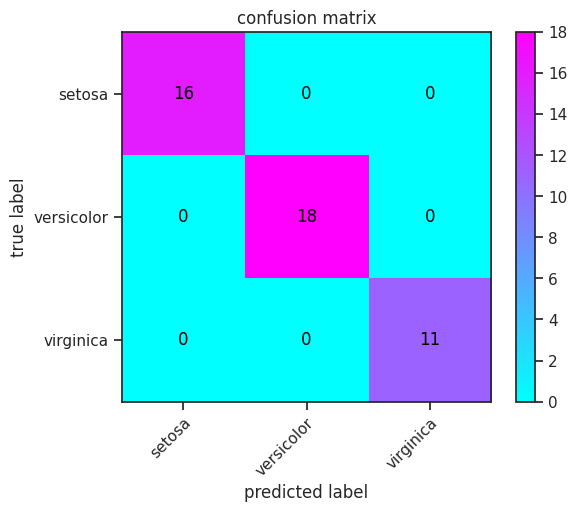

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cm,class_names=class_names,colorbar=True,cmap= 'cool',fontcolor_threshold=2)
#plt.tight_layout()
sns.set_theme(style='ticks')
plt.title("confusion matrix")
plt.savefig('P.png')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [ ]:
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_hat = clf.predict(X_test)
y_hat

array(['virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor'],
      dtype='<U10')

In [ ]:
print('Accuracy Score:{:.4f}'.format(accuracy_score(y_test,y_hat)))
print(classification_report(y_test,y_hat))
cm = confusion_matrix(y_test,y_hat)
print(cm)


Accuracy Score:0.9556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.88      0.93        16
   virginica       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[14  0  0]
 [ 0 14  2]
 [ 0  0 15]]


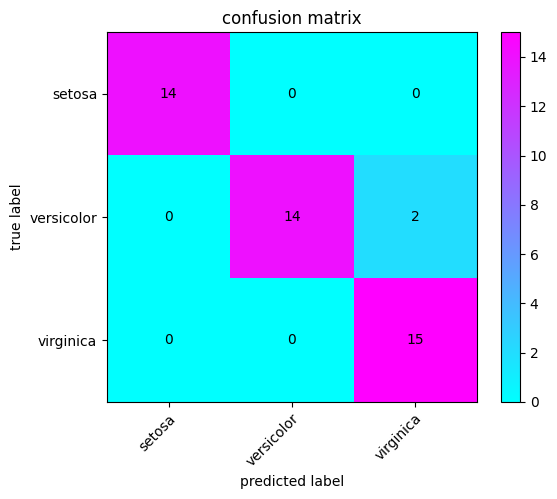

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cm,class_names=class_names,colorbar=True,cmap= 'cool',fontcolor_threshold=2)
#plt.tight_layout()
sns.set_theme(style='ticks')
plt.title("confusion matrix")
plt.savefig('P.png')
plt.show()